In [90]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
from main import segment_fish
from utils.compute_iou import compute_ious

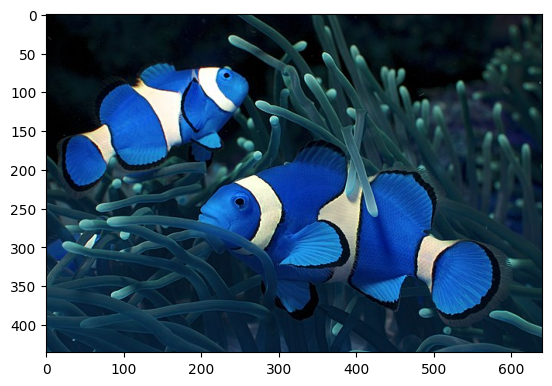

In [91]:
nemo = cv2.imread("./dataset/train/imgs/nemo001.jpg")
plt.imshow(nemo)
plt.show()

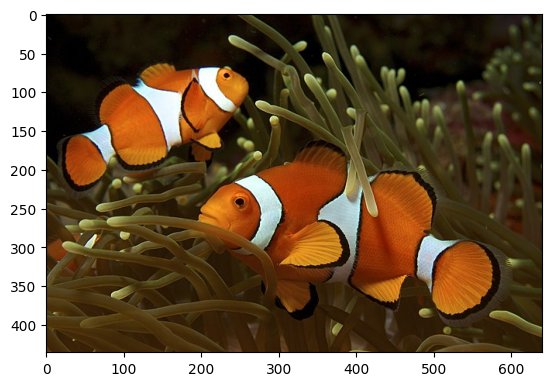

In [92]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

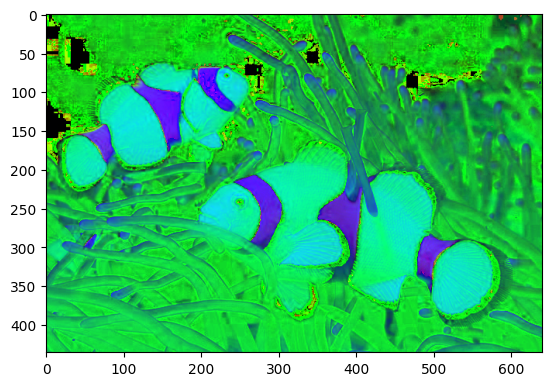

In [93]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
plt.imshow(nemo)
plt.show()

In [94]:
light_orange = (1, 190, 150)
dark_orange = (30, 255, 255)

In [95]:
mask_orange = cv2.inRange(nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask_orange)

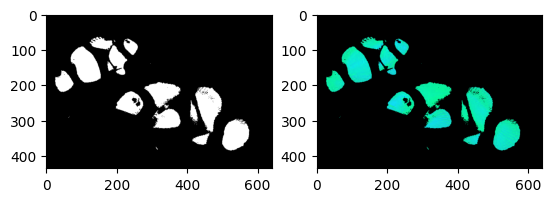

In [96]:
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


In [97]:
light_white = (60, 0, 200)
dark_white = (145, 150, 255)

In [98]:
mask_white = cv2.inRange(nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

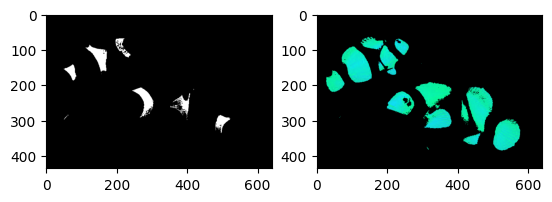

In [99]:
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [100]:
final_mask = mask_orange + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

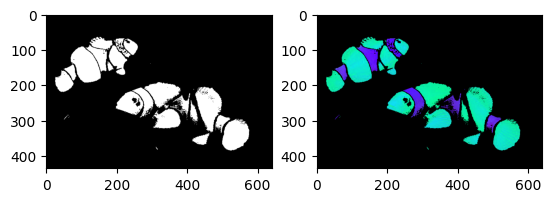

In [101]:
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


In [102]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
len(img_paths)

5

(436, 640, 3) 0.5760528137145291


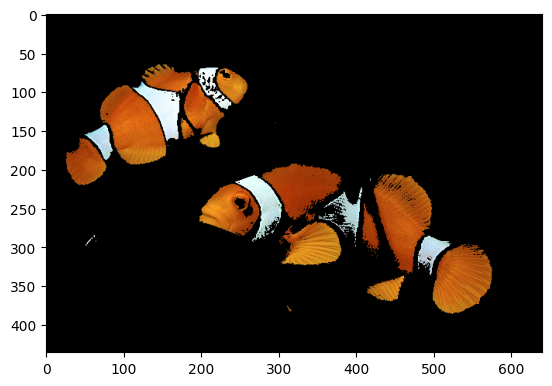

(450, 600, 3) 0.6116046109493144


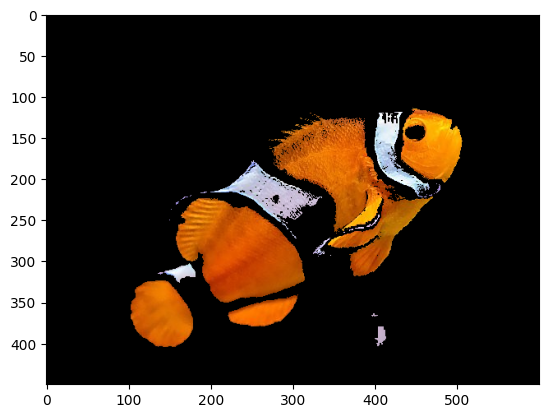

(600, 600, 3) 0.6590357722312045


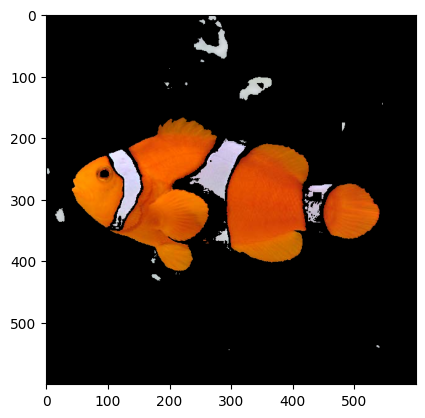

(845, 1200, 3) 0.6727758106525172


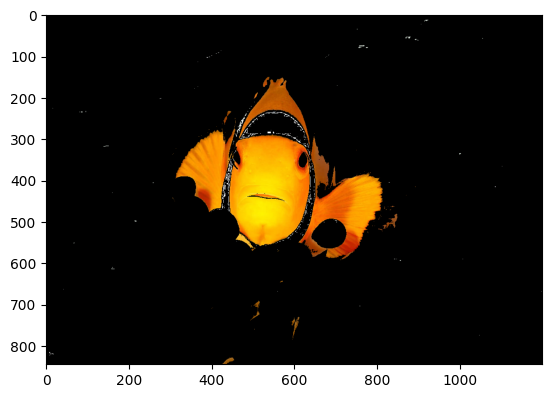

(793, 1200, 3) 0.6411115001860417


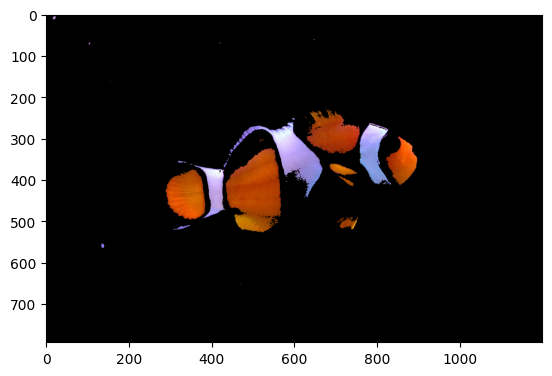

In [103]:
masks = dict()

for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,:], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()